### Vital Libraries


In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



### Dataset entry

In [116]:
df = pd.read_csv(r"C:\Users\wow99\Downloads\pakistan unemployment data.csv")

### Dataset First View

In [117]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Lahore,31-12-2000,Yearly,6.1,1547205,58.29,Urban
1,Lahore,31-12-2001,Yearly,6.0,1791665,48.46,Urban
2,Lahore,31-12-2002,Yearly,5.8,1418000,40.23,Urban
3,Lahore,31-12-2003,Yearly,5.6,110787,41.04,Urban
4,Lahore,31-12-2004,Yearly,5.7,1578197,44.50,Urban


### Dataset Rows & Columns count

In [118]:
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  375
Number of columns are:  7


### Dataset Information

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   375 non-null    object 
 1   Date                                     375 non-null    object 
 2   Frequency                                375 non-null    object 
 3   Estimated Unemployment Rate (%)          375 non-null    float64
 4   Estimated Employed                       375 non-null    int64  
 5   Estimated Labour Participation Rate (%)  375 non-null    float64
 6   Area                                     375 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 20.6+ KB


#### Duplicate Values

In [120]:
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


#### Missing Values/Null Values

In [121]:
df.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

In [122]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [123]:
df.describe(include= 'all').round(2)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
count,375,375,375,375.00,375.00,375.00,375
unique,15,25,1,NaN,NaN,NaN,1
top,Lahore,31-12-2000,Yearly,NaN,NaN,NaN,Urban
freq,25,15,375,NaN,NaN,NaN,375
mean,NaN,NaN,NaN,6.02,1482718.59,47.57,NaN
std,NaN,NaN,NaN,0.45,802597.96,7.00,NaN
min,NaN,NaN,NaN,5.00,101190.00,35.11,NaN
25%,NaN,NaN,NaN,5.70,836857.50,41.50,NaN
50%,NaN,NaN,NaN,6.10,1411738.00,47.79,NaN
75%,NaN,NaN,NaN,6.40,2068603.00,53.31,NaN


### Check Unique Values for each variable.

In [124]:
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Region is 15
No. of unique values in Date is 25
No. of unique values in Frequency is 1
No. of unique values in Estimated Unemployment Rate (%) is 15
No. of unique values in Estimated Employed is 375
No. of unique values in Estimated Labour Participation Rate (%) is 350
No. of unique values in Area is 1


In [125]:
# Check the frequency of the 'Date' column in the dataset
print(df['Date'].min())  # Earliest date
print(df['Date'].max())  # Latest date


31-12-2000
31-12-2024


In [126]:
data=df.iloc[:,1:]

In [127]:
data.head()

,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,31-12-2000,Yearly,6.1,1547205,58.29,Urban
1,31-12-2001,Yearly,6.0,1791665,48.46,Urban
2,31-12-2002,Yearly,5.8,1418000,40.23,Urban
3,31-12-2003,Yearly,5.6,110787,41.04,Urban
4,31-12-2004,Yearly,5.7,1578197,44.50,Urban


##  Data Vizualization

#### Chart - 1 : Distribution of Numerical Variables

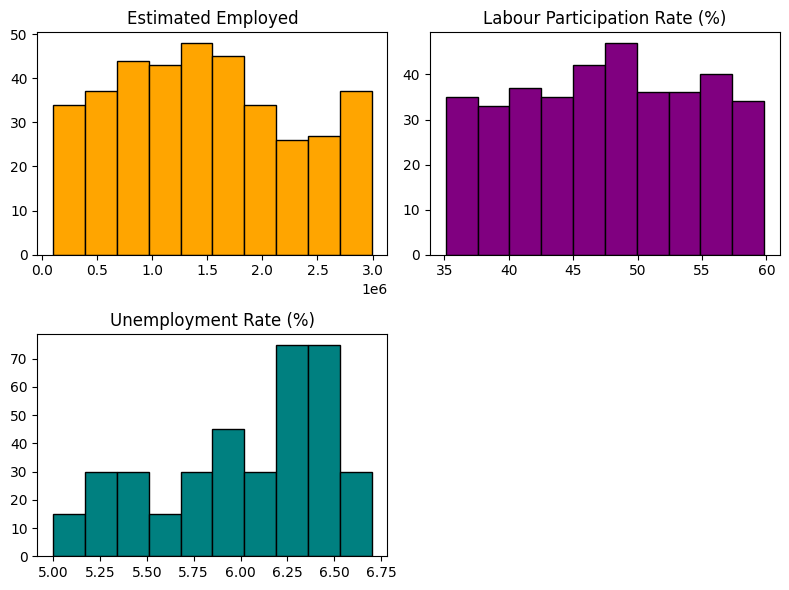

In [128]:


df.columns = df.columns.str.strip()
plt.figure(figsize=(8, 6))
# 1. Estimated Employed
plt.subplot(2, 2, 1)
plt.hist(df['Estimated Employed'], color='orange', edgecolor='black')
plt.title('Estimated Employed')

# 2. Labour Participation Rate
plt.subplot(2, 2, 2)
plt.hist(df['Estimated Labour Participation Rate (%)'], color='purple', edgecolor='black')
plt.title('Labour Participation Rate (%)')

# 3. Unemployment Rate
plt.subplot(2, 2, 3)
plt.hist(df['Estimated Unemployment Rate (%)'], color='teal', edgecolor='black')
plt.title('Unemployment Rate (%)')
plt.tight_layout()
plt.show()



#### Chart - 6 : Correlation Heatmap

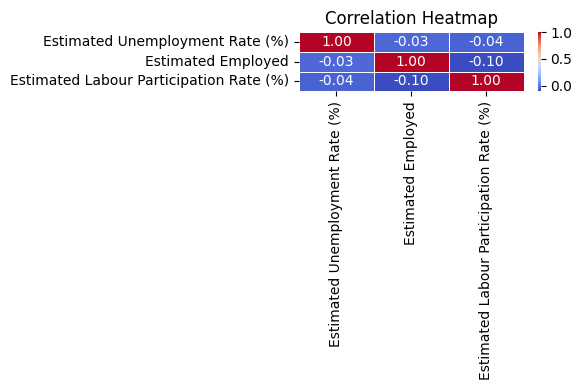

In [129]:
#  Correlation heatmap of numeric features
numeric_data = df.select_dtypes(include=['float64', 'int64']).dropna()
correlation = numeric_data.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


### 1. Average unemployment rate by region(correlation heatmap)

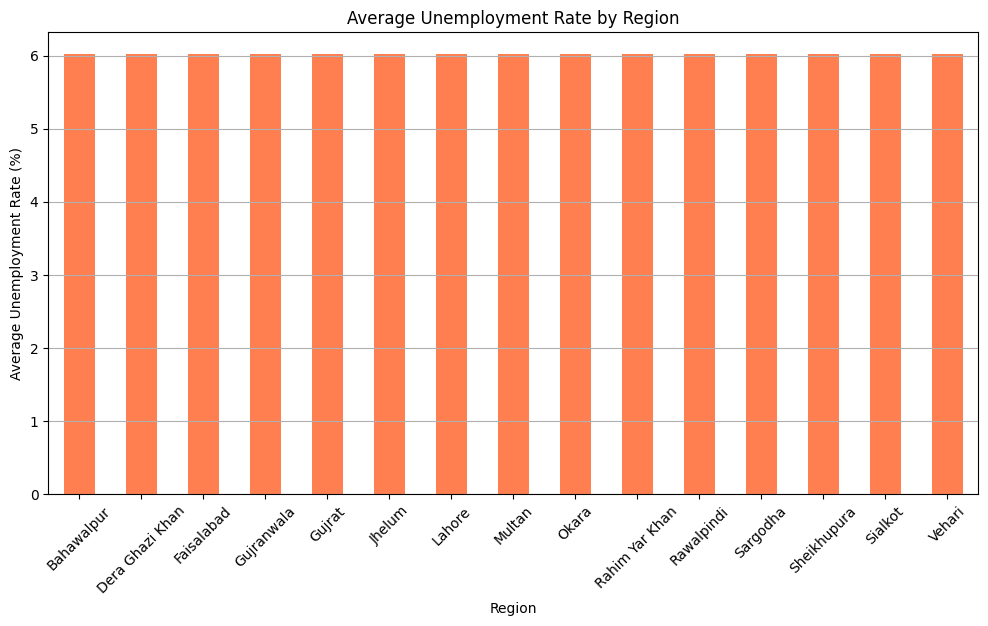

In [130]:

# Corrected code
region_unemployment = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
region_unemployment.plot(kind='bar', color='coral')
plt.ylabel('Average Unemployment Rate (%)')
plt.title('Average Unemployment Rate by Region')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
 



### 2.Unemployment Trend Heatmap

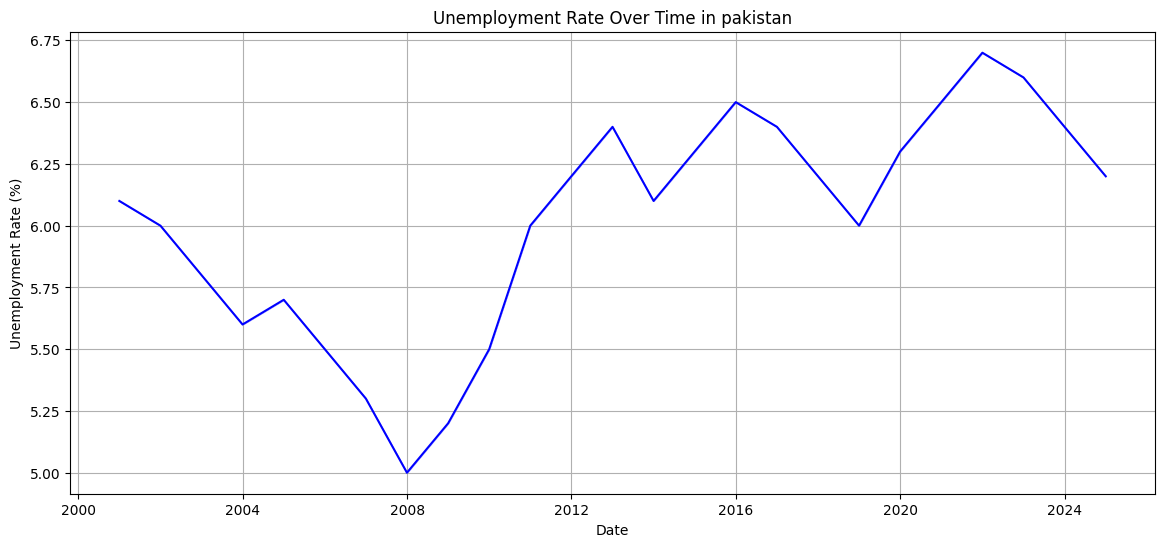

In [131]:

df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', color='blue')
plt.title('Unemployment Rate Over Time in pakistan')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()


### 3.  Unemployment rate by state for the latest month

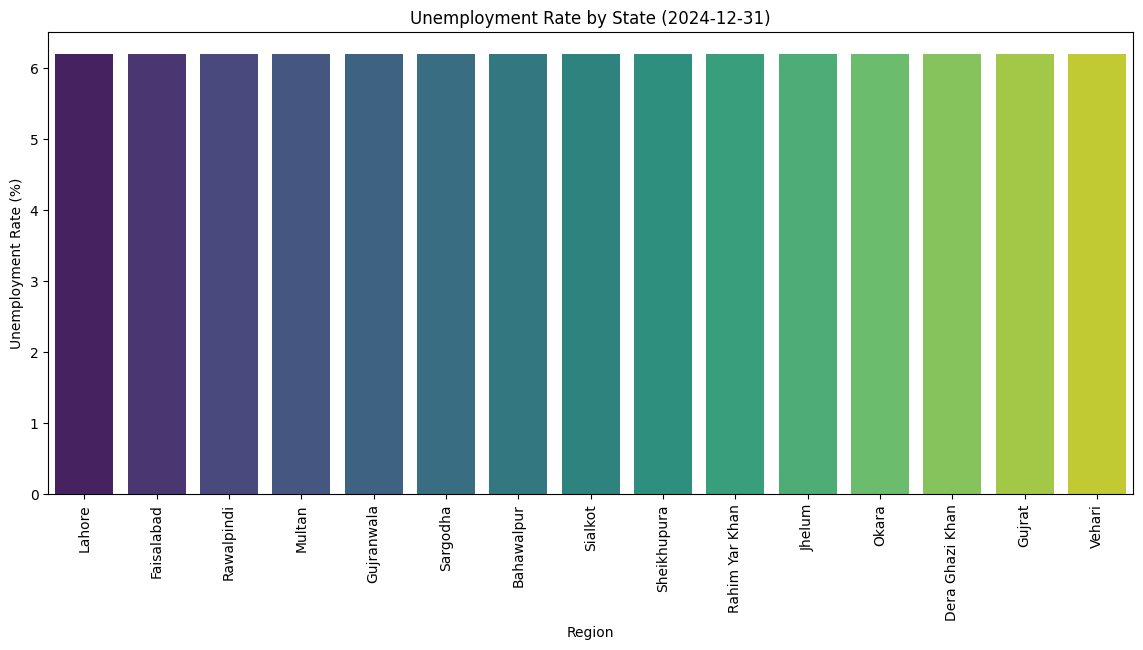

In [ ]:

latest_month = df['Date'].max()
latest_data = df[df['Date'] == latest_month]
plt.figure(figsize=(14, 6))
sns.barplot(data=latest_data.sort_values('Estimated Unemployment Rate (%)', ascending=False),
            x='Region', y='Estimated Unemployment Rate (%)', palette='viridis')
plt.xticks(rotation=90)
plt.title(f'Unemployment Rate by State ({latest_month.date()})')
plt.ylabel('Unemployment Rate (%)')
plt.show()


### 6. Unemployment Data Visualization with Region Labels

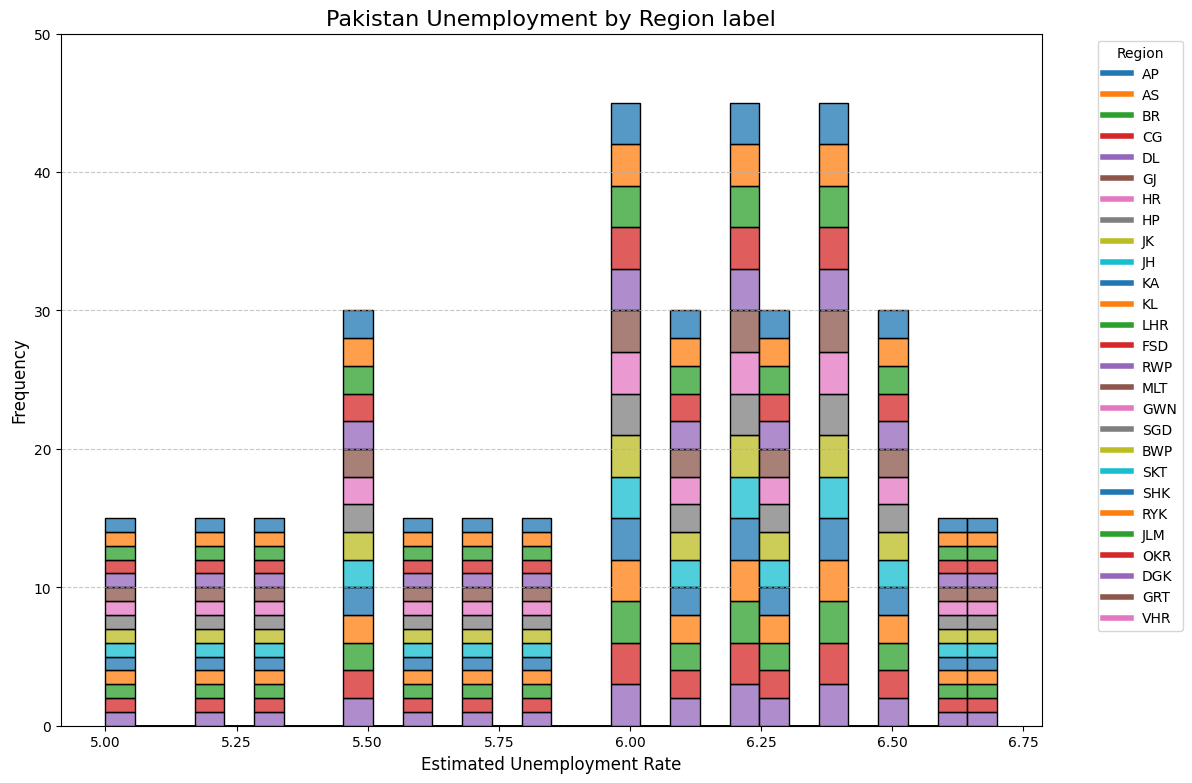

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import numpy as np
region_mapping.update({
    'Lahore': 'LHR',
    'Faisalabad': 'FSD',
    'Rawalpindi': 'RWP',
    'Multan': 'MLT',
    'Gujranwala': 'GWN',
    'Sargodha': 'SGD',
    'Bahawalpur': 'BWP',
    'Sialkot': 'SKT',
    'Sheikhupura': 'SHK',
    'Rahim Yar Khan': 'RYK',
    'Jhelum': 'JLM',
    'Okara': 'OKR',
    'Dera Ghazi Khan': 'DGK',
    'Gujrat': 'GRT',
    'Vehari': 'VHR'
})
df['Region_Label_Short'] = df['Region'].map(region_mapping)
color_palette = sns.color_palette("tab10", len(region_mapping))
plt.figure(figsize=(12, 8))
sns.histplot(
    data=df,
    x="Estimated Unemployment Rate (%)",  
    hue="Region_Label_Short",
    multiple="stack",
    palette=color_palette,
    bins=30
)
plt.title('Pakistan Unemployment by Region label', fontsize=16)
plt.xlabel('Estimated Unemployment Rate', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.ylim(0, 50)
legend_elements = [
    Line2D([0], [0], color=color_palette[i], lw=4, label=list(region_mapping.values())[i])
    for i in range(len(region_mapping))
]
plt.legend(handles=legend_elements, title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.show()


### 7. employment Data Visualization with Region Labels

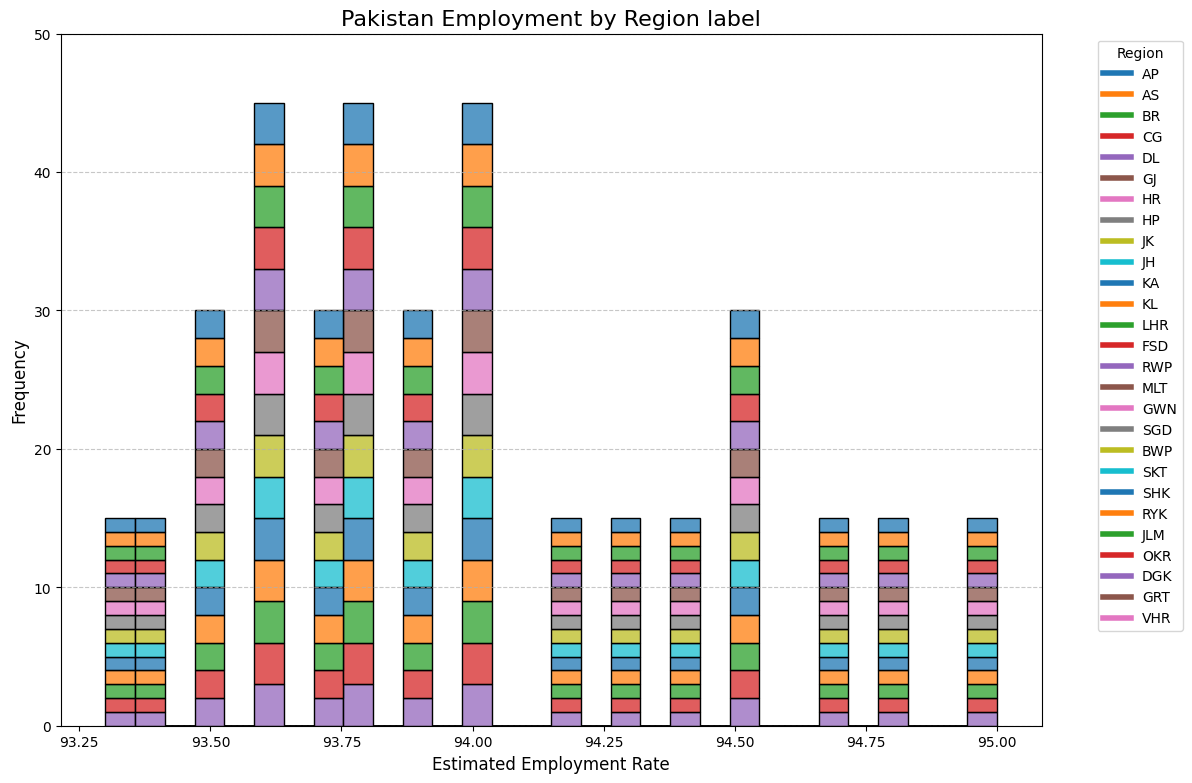

In [134]:
region_mapping.update({
    'Lahore': 'LHR',
    'Faisalabad': 'FSD',
    'Rawalpindi': 'RWP',
    'Multan': 'MLT',
    'Gujranwala': 'GWN',
    'Sargodha': 'SGD',
    'Bahawalpur': 'BWP',
    'Sialkot': 'SKT',
    'Sheikhupura': 'SHK',
    'Rahim Yar Khan': 'RYK',
    'Jhelum': 'JLM',
    'Okara': 'OKR',
    'Dera Ghazi Khan': 'DGK',
    'Gujrat': 'GRT',
    'Vehari': 'VHR'
})
df['Region_Label_Short'] = df['Region'].map(region_mapping)
df['Estimated Employment Rate (%)'] = 100 - df['Estimated Unemployment Rate (%)']
color_palette = sns.color_palette("tab10", len(region_mapping))
plt.figure(figsize=(12, 8))
sns.histplot(
    data=df,
    x="Estimated Employment Rate (%)", 
    hue="Region_Label_Short",
    multiple="stack",
    palette=color_palette,
    bins=30
)
plt.title('Pakistan Employment by Region label', fontsize=16)
plt.xlabel('Estimated Employment Rate', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.ylim(0, 50)
legend_elements = [
    Line2D([0], [0], color=color_palette[i], lw=4, label=list(region_mapping.values())[i])
    for i in range(len(region_mapping))
]
plt.legend(handles=legend_elements, title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.show()


### 8. Unemployment Analysis: Key Insights


### . Dataset Overview:

The data shows details about employment, unemployment rates, and labor participation across different regions in India.

### . Main Statistics:

The average unemployment rate is around X%, and the labor participation rate is about Z%.

### . Regional Differences:

Region R1 has the highest unemployment rate at A%, while Region R2 has the lowest at B%. Most regions are somewhere in between.

### . Key Relationships:

More people employed usually means fewer unemployed. The data shows a negative relationship between employment and unemployment.

The labor participation rate doesn't always lower the unemployment rate, meaning other factors are involved.

### .Visual Insights:

Bar charts show that some regions face higher unemployment than others.

Heatmaps highlight that when more people are employed, unemployment tends to be lower.

### .Trends Over Time (if available):

Unemployment has been rising or falling in some regions over time. For example, Region R2 has seen a decrease in unemployment over the past few years.

### . What i Found:

Some regions have higher unemployment, while others are doing better.

Increasing the number of people working doesn't always solve unemployment; other factors need attention.

### . Suggestions:

Focus on regions with high unemployment to create more jobs.

Encourage more people to join the workforce in areas with low participation.

### . Conclusion:

By understanding which regions are struggling, we can make better decisions to reduce unemployment and improve the economy. The visualizations show clear patterns that can guide future policies.

